Features

- Price(€)
- Rooms
- mq : house square meters
- Type : house tipe, should be 1 ,2 or 3
- Desc : the house description in Italian
- City
- Street

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"C:\Users\admin\Desktop\AI ML\ML\Linear regression\Italian_house_price.csv")
df

,Price(€),Rooms,mq,Type,Desc,City,Zone,Street
0,142000.0,4,130,1,"In via Ettore Vitale, strada principale del qu...",Catanzaro,Pontegrande - Sant'Elia,"Via Ettore Vitale, 12"
1,249000.0,4,108,1,Rif: PRQUAD - La Tempocasa di Cagliari San Ben...,Cagliari,San Benedetto,Via Giovan Battista Pergolesi
2,495000.0,5,117,2,Living Alberione: Luminoso attico collocato al...,Trento,San Pio X,via alberione
3,89000.0,3,93,1,"Cornigliano/Coronata parte alta, Via Paradisio...",Genova,Cornigliano,Via Paradiso
4,495000.0,5,89,2,In Vendita Loft/Mansarda a Venezia Sestiere di...,Venezia,Arsenale - Giardini della Biennale,CASTELLO
...,...,...,...,...,...,...,...,...
15993,150000.0,4,120,1,Graziosissimo e spazioso appartamento con due ...,Torino,Madonna di Campagna,Corso Grosseto
15994,99000.0,3,70,1,Torino -Zona San Donato - Via Vicenza 23 - Pro...,Torino,Don Bosco,Via Vicenza
15995,318000.0,5,135,2,"Proponiamo ampio appartamento al quarto piano,...",Torino,Pozzo Strada,Corso Trapani 40
15996,62000.0,3,70,1,A 500 metri dalla Via Libertà e precisamente i...,Palermo,Borgo Vecchio,Via Dalia


In [3]:
df.describe()

,Price(€),Rooms,mq,Type
count,1.599800e+04,15998.000000,15998.000000,15998.000000
mean,3.564216e+05,3.630891,121.178710,1.583448
std,4.424895e+05,1.896876,81.139571,0.680417
min,1.000000e+00,0.000000,1.000000,1.000000
25%,1.350000e+05,3.000000,75.000000,1.000000
50%,2.400000e+05,4.000000,101.000000,1.000000
75%,4.100000e+05,5.000000,140.000000,2.000000
max,8.200000e+06,140.000000,980.000000,3.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15998 entries, 0 to 15997
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price(€)  15998 non-null  float64
 1   Rooms     15998 non-null  int64  
 2   mq        15998 non-null  int64  
 3   Type      15998 non-null  int64  
 4   Desc      15993 non-null  object 
 5   City      15998 non-null  object 
 6   Zone      15998 non-null  object 
 7   Street    15998 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 1000.0+ KB


In [5]:
df[df.Desc.isna()]

,Price(€),Rooms,mq,Type,Desc,City,Zone,Street
3112,80000.0,3,70,1,NaN,Catanzaro,Fortuna - Corvo,Via Latina
7926,170000.0,1,51,1,NaN,Milano,Ponte Nuovo,Via Federico Bellazzi
10386,290000.0,2,80,1,NaN,Trieste,Borgo Teresiano,Via 30 Ottobre
15549,825000.0,3,825,1,NaN,Trieste,Chiarbola - Ponziana,Via dell'Istria
15599,540000.0,5,168,2,NaN,Napoli,Pigna - Omodeo,Via Guido De Ruggiero


In [6]:
df.dropna(inplace = True)

In [7]:
df

,Price(€),Rooms,mq,Type,Desc,City,Zone,Street
0,142000.0,4,130,1,"In via Ettore Vitale, strada principale del qu...",Catanzaro,Pontegrande - Sant'Elia,"Via Ettore Vitale, 12"
1,249000.0,4,108,1,Rif: PRQUAD - La Tempocasa di Cagliari San Ben...,Cagliari,San Benedetto,Via Giovan Battista Pergolesi
2,495000.0,5,117,2,Living Alberione: Luminoso attico collocato al...,Trento,San Pio X,via alberione
3,89000.0,3,93,1,"Cornigliano/Coronata parte alta, Via Paradisio...",Genova,Cornigliano,Via Paradiso
4,495000.0,5,89,2,In Vendita Loft/Mansarda a Venezia Sestiere di...,Venezia,Arsenale - Giardini della Biennale,CASTELLO
...,...,...,...,...,...,...,...,...
15993,150000.0,4,120,1,Graziosissimo e spazioso appartamento con due ...,Torino,Madonna di Campagna,Corso Grosseto
15994,99000.0,3,70,1,Torino -Zona San Donato - Via Vicenza 23 - Pro...,Torino,Don Bosco,Via Vicenza
15995,318000.0,5,135,2,"Proponiamo ampio appartamento al quarto piano,...",Torino,Pozzo Strada,Corso Trapani 40
15996,62000.0,3,70,1,A 500 metri dalla Via Libertà e precisamente i...,Palermo,Borgo Vecchio,Via Dalia


C:\Users\admin\AppData\Local\Temp\ipykernel_8448\308358588.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = "Blues")


<Axes: >

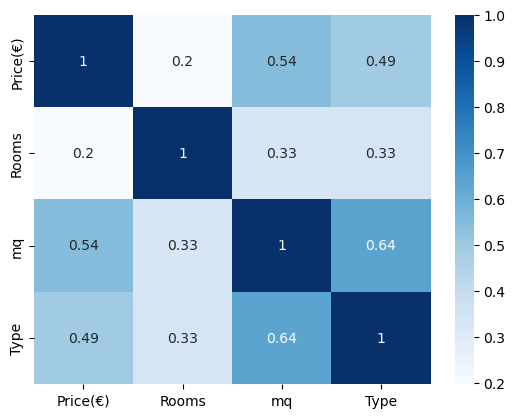

In [8]:
sns.heatmap(df.corr(), annot = True, cmap = "Blues")

- mq has more correlation with price
- type has more correlation with price

<Axes: xlabel='Type', ylabel='Price(€)'>

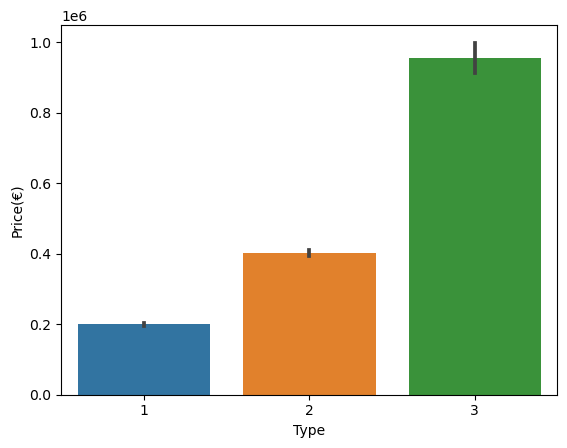

In [9]:
sns.barplot(data = df,
               x = df['Type'],
               y = df['Price(€)'])

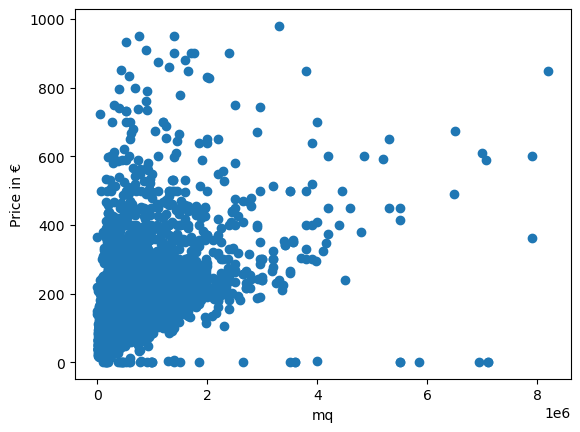

In [10]:
plt.xlabel('mq')
plt.ylabel('Price in €')
plt.scatter(df['Price(€)'], df['mq'])

C:\Users\admin\AppData\Local\Temp\ipykernel_8448\1481850759.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price(€)'])


<Axes: xlabel='Price(€)', ylabel='Density'>

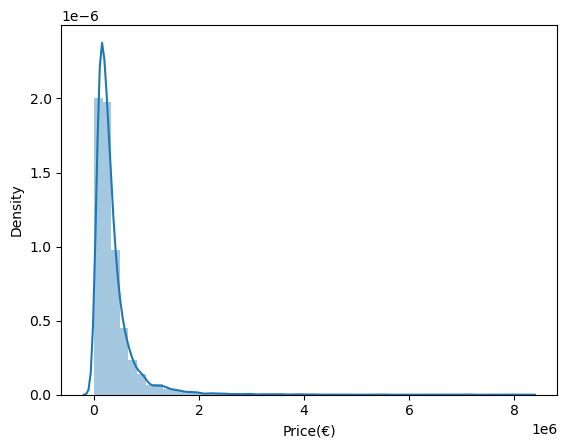

In [11]:
sns.distplot(df['Price(€)'])

In [12]:
df.drop(columns = df[['Desc','City','Zone','Street']],
        axis = 1, inplace = True)

In [13]:
df

,Price(€),Rooms,mq,Type
0,142000.0,4,130,1
1,249000.0,4,108,1
2,495000.0,5,117,2
3,89000.0,3,93,1
4,495000.0,5,89,2
...,...,...,...,...
15993,150000.0,4,120,1
15994,99000.0,3,70,1
15995,318000.0,5,135,2
15996,62000.0,3,70,1


In [14]:
X = df[['Rooms','mq','Type']]
y = df['Price(€)']

In [26]:
# Training dataset is 80%
# Test dataset 20%
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [27]:
# Selects random samples
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12794, 3)
(3199, 3)
(12794,)
(3199,)


In [28]:
y_train

14584    101000.0
14641    195000.0
4337     128000.0
6262     295000.0
10028    230000.0
           ...   
11636    172000.0
1344      90000.0
12818    239000.0
7294     450000.0
1289     115000.0
Name: Price(€), Length: 12794, dtype: float64

In [29]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = reg.predict(X_test)

In [35]:
y_pred

array([333856.82467448, 176546.76014913, 339899.44170592, ...,
       458737.57665754, 203645.61831881, 956820.07450778])

In [31]:
y_test

14734      46500.0
4304       88000.0
11651     219000.0
10433    1190000.0
9386      198000.0
           ...    
9607      138000.0
1002      138000.0
9215      795000.0
6781      300000.0
7252      985000.0
Name: Price(€), Length: 3199, dtype: float64

In [32]:
reg.score(X_test, y_test)

0.349021736999683

In [36]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [38]:
print("mean square error {}".format(mse))
print("R square value {}".format(r_squared))

mean square error 143929031003.896
R square value 0.349021736999683
